Here is a barchart showing how many images are in each catagory

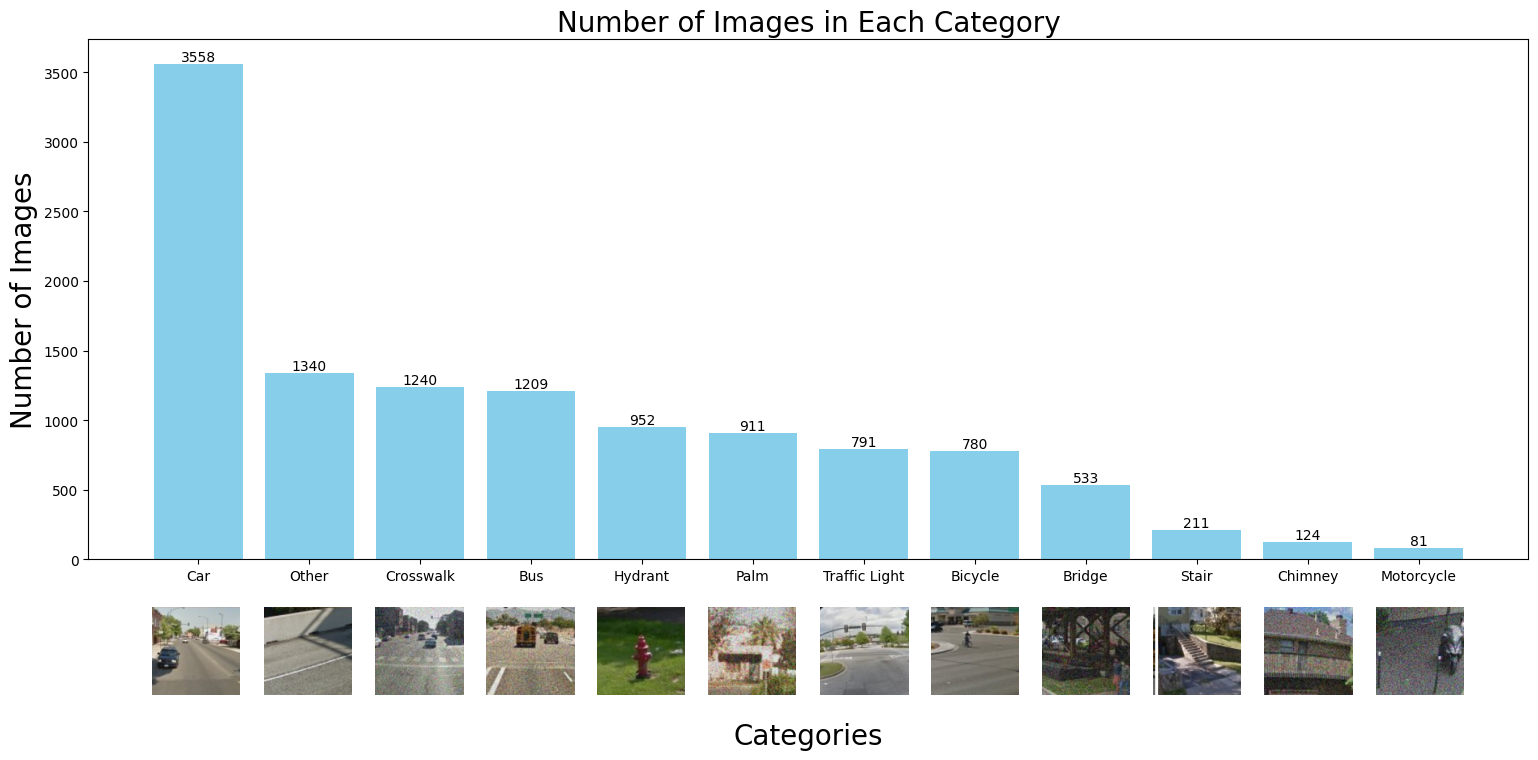

In [2]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import Counter

# Define the path to your dataset
dataset_path = "./dataset/images"

# Dictionary to store counts for each category and a sample image for each
category_counts = Counter()
sample_images = {}

# Loop through each folder in the dataset directory
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    if os.path.isdir(category_path):
        image_files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]
        num_images = len(image_files)
        category_counts[category] = num_images

        # Store a sample image path if it exists
        if image_files:
            sample_images[category] = os.path.join(category_path, image_files[0])

# Sort counts from most to least and prepare data for bar chart
sorted_counts = category_counts.most_common()
categories = [category for category, count in sorted_counts]
counts = [count for category, count in sorted_counts]

fig, ax = plt.subplots(figsize=(16, 8))
bars = ax.bar(categories, counts, color='skyblue')
ax.set_ylabel('Number of Images', fontsize=20)
ax.set_xlabel('Categories',fontsize=20, labelpad=100)
ax.set_title('Number of Images in Each Category', fontsize=20)
ax.set_xticks(range(len(categories)))  # Position ticks for each bar
ax.set_xticklabels(categories)


# Add count labels on top of each bar
for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
            ha='center', va='bottom')



# Define parameters for image placement
image_width = 0.11
image_height = 0.11
y_offset = 0.08  # Position below each bar
spacing = 0   # Space between images

# Display sample images in a row
for i, category in enumerate(categories):
    if category in sample_images:
        img_path = sample_images[category]

        # Check if image path exists and load
        if os.path.exists(img_path):
            img = mpimg.imread(img_path)

            # Define inset axis for the image
            x0 = i * (0.834 / len(categories)) + 0.0625  # Center image under the bar
            inset_ax = fig.add_axes((x0, y_offset, image_width, image_height), transform=ax.transAxes)  # Adjust width and height

            # Display image in the inset axis
            inset_ax.imshow(img)
            inset_ax.axis('off')  # Hide inset axis
# Add category labels below the bars with specific y value


# Adjust y-axis limit to make room for images below the bars
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.25)  # Adjust these values as needed
plt.show()

Here is a histogram showing the distribution of the catagories

Image counts by category:
Bicycle: 780 images
Bridge: 533 images
Bus: 1209 images
Car: 3558 images
Chimney: 124 images
Crosswalk: 1240 images
Hydrant: 952 images
Motorcycle: 81 images
Other: 1340 images
Palm: 911 images
Stair: 211 images
Traffic Light: 791 images


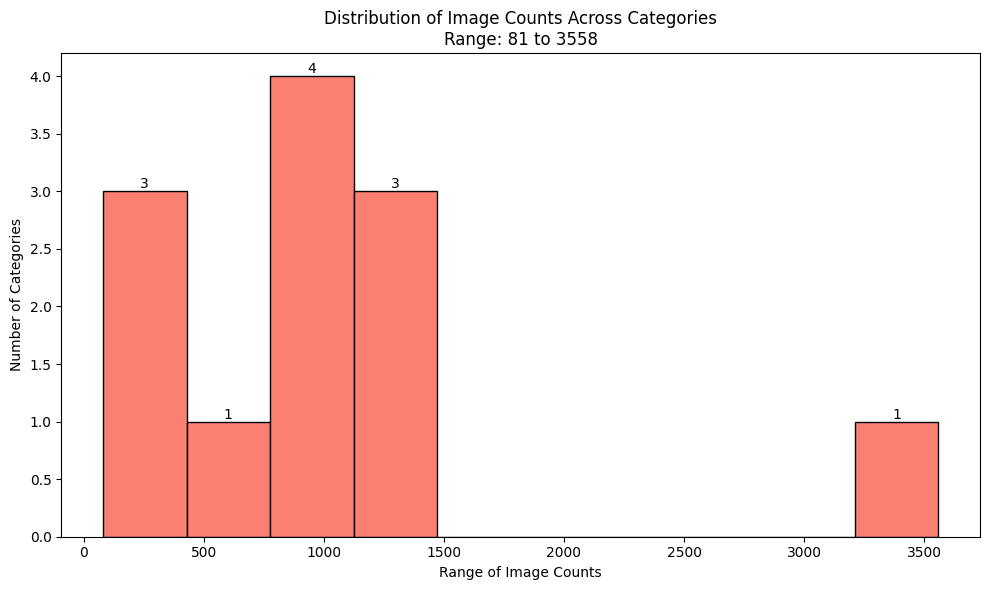

In [3]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from collections import Counter

# Define the path to your dataset
dataset_path = "./dataset/images"

# Dictionary to store counts for each category
category_counts = Counter()

# Loop through each folder in the dataset directory
for category_folder in os.listdir(dataset_path):
    # Get the path to the category folder
    category_path = os.path.join(dataset_path, category_folder)

    # Check if it is a folder (in case there are any non-folder files)
    if os.path.isdir(category_path):
        # Count the images in the category folder
        num_images = len([f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))])

        # Update the counter with the category name and image count
        category_counts[category_folder] = num_images

# Extract the counts to use in the histogram
counts = list(category_counts.values())

# Calculate the range of data
min_count = min(counts)
max_count = max(counts)

# Create a histogram of the count frequencies in different ranges
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(counts, bins=10, color='salmon', edgecolor='black')  # Set bins based on your desired range
plt.xlabel('Range of Image Counts')
plt.ylabel('Number of Categories')
plt.title(f'Distribution of Image Counts Across Categories\nRange: {min_count} to {max_count}')
plt.tight_layout()

# Add frequency labels above each bin in the histogram
for i in range(len(patches)):
    height = patches[i].get_height()
    if height > 0:
        plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, str(int(height)),
                 ha='center', va='bottom')  # Center text on the bin

# Display the histogram
plt.show()

Here is my interactive plot

In [23]:
import os
import pandas as pd
import panel as pn
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, TapTool, CustomJS
from collections import Counter

# Initialize Panel extension
pn.extension()

# Define the path to your dataset
dataset_path = "./dataset/images"

# Dictionary to store counts for each category
category_counts = Counter()

# Loop through each folder in the dataset directory
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        num_images = len([f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))])
        category_counts[category] = num_images

# Convert to DataFrame
data = pd.DataFrame.from_dict(category_counts, orient='index', columns=['Count']).reset_index()
data.columns = ['Category', 'Count']


# Create a Bokeh plot
def create_interactive_plot():
    source = ColumnDataSource(data)

    p = figure(x_range=data['Category'], title="Number of Images in Each Category",
               tools="tap", height=400, width=700)
    p.vbar(x='Category', top='Count', source=source, width=0.9, color='skyblue')

    # Customize the hover tool to display counts
    p.add_tools(TapTool())
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.yaxis.axis_label = "Number of Images"
    p.xaxis.axis_label = "Categories"

    # JavaScript callback to show the count when a bar is clicked
    callback = CustomJS(args=dict(source=source), code="""
        var indices = source.selected.indices;
        if (indices.length > 0) {
            var index = indices[0];
            var count = source.data['Count'][index];
            alert('Count: ' + count);
        }
    """)

    p.js_on_event('tap', callback)

    return pn.pane.Bokeh(p)


# Create the Panel layout
layout = pn.Column("# Image Count by Category", create_interactive_plot())

# Display the Panel
layout.servable()

Column
    [0] Markdown(str)
    [1] Bokeh(figure)